# Data Preparation and Processing

In [ ]:
#!pip install scikit-learn # install scikit-learn

Code below derived from https://youtu.be/qFJeN9V1ZsI

In [ ]:
conda list

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
import csv

In [2]:
train_labels = []
train_samples = []

Lee J, Joo H, Lee J, Chee Y. Automatic Classification of Squat Posture Using Inertial Sensors: Deep Learning Approach. Sensors (Basel). 2020 Jan 8;20(2):361. doi: 10.3390/s20020361.
<br><br> Based on this paper, we can classify squat move into 6 labels:
<br> - Acceptable (ACC, 0)
<br> - Anterior knee (AK, 1)
<br> - Knee valgus (KVG, 2)
<br> - Knee varus (KVR, 3)
<br> - Half squat (HS, 4)
<br> - Bent over (BO, 5)
<br> - Other (OT, 6)

In [3]:
# Image(filename='assets/normalizationApproach.jpg') 

In [4]:
## Read data from CSV file
columns = ['left_knee_angle', 'left_hip_angle', 'left_ankle_angle', 'right_knee_angle', 'right_hip_angle', 'right_ankle_angle', 'left_hip_to_right_hip', 'left_torso_height_to_hip_width_ratio', 'right_torso_height_to_hip_width_ratio', 'shoulder_width_to_hip_width_ratio', 'left_thigh_height_to_hip_width_ratio', 'right_thigh_height_to_hip_width_ratio', 'left_shin_length_to_hip_width_ratio', 'right_shin_length_to_hip_width_ratio', 'left_ankle_to_left_heel_to_hip_width_ratio', 'left_heel_to_left_foot_index_to_hip_width_ratio', 'left_foot_index_to_left_ankle_to_hip_width_ratio', 'right_ankle_to_right_heel_to_hip_width_ratio', 'right_heel_to_right_foot_index_to_hip_width_ratio', 'right_foot_index_to_right_ankle_to_hip_width_ratio', 'knee_width_to_hip_width_ratio']
labels = ["acc", "ak", "bo", "kvg", "kvr", "hs", "others"]
path = 'assets/main_train.csv'

with open(path, 'r') as file:

    # Create a CSV reader object that reads the file as a dictionary
    reader = csv.DictReader(file)

    for r in reader:
        if(labels.index(r['target']) != 6 and labels.index(r['target']) != 5):
            
            # Normalize vector
            features = []
        
            for i in columns:
                features.append(np.float_(r[i]))

            # Add to arrays
            train_samples.append(features)
            train_labels.append(labels.index(r['target']))
# print(train_labels)

In [5]:
## Prepare input for Keras fit function
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples) # This to eliminate order or patterns of the sample

In [6]:
## Normalize the data to [0-1]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples) # reshape since fit_transform does not take 1D array


# Sequential Model

Code below derived from https://youtu.be/qFJeN9V1ZsI

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [8]:
## Running the model a GPU
physical_device = tf.config.experimental.list_physical_devices('GPU')
print("Num GPU available: ", len(physical_device))
tf.config.experimental.set_memory_growth(physical_device[0], True)

Num GPU available:  1


In [9]:
## Creating a sequential model
# Sequential Model is a linear stack model
model = Sequential([
    Dense(units=49152, input_shape=(21,), activation='relu'), #First hidden layer
    # input_shape - tells what's the model should expect for input
    # units - numbers of nodes in that layer
    # activation - 'relu' tells to follow the activation value
    # Dense - a layer to tell fully connected layer
#     Dense(units=64, activation='relu'),
#     Dense(units=128, activation='relu'),
#     Dense(units=512, activation='relu'),
#     Dense(units=2048, activation='relu'),
#     Dense(units=256, activation='relu'),
#     Dense(units=128, activation='relu'),
    Dense(units=5, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 49152)             1081344   
                                                                 
 dense_1 (Dense)             (None, 5)                 245765    
                                                                 
Total params: 1,327,109
Trainable params: 1,327,109
Non-trainable params: 0
_________________________________________________________________


In [11]:
## Prepare model for training
model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [25]:
## Training the model
# batch_size - number of sample size pass to training at 1 time
# epochs - number of time the model has to train on the sample
# shuffle - default true
# verbose - see output messsage
# validation_split - tell how many percent are used to validate the model; validate use to tell if the model is overfit or underfit
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=100, epochs=100, shuffle=True, verbose=2)


Epoch 1/100
47/47 - 0s - loss: 0.4074 - accuracy: 0.8650 - val_loss: 0.3812 - val_accuracy: 0.8809 - 410ms/epoch - 9ms/step
Epoch 2/100
47/47 - 1s - loss: 0.4054 - accuracy: 0.8658 - val_loss: 0.3808 - val_accuracy: 0.8809 - 515ms/epoch - 11ms/step
Epoch 3/100
47/47 - 1s - loss: 0.4040 - accuracy: 0.8656 - val_loss: 0.3779 - val_accuracy: 0.8848 - 575ms/epoch - 12ms/step
Epoch 4/100
47/47 - 1s - loss: 0.4022 - accuracy: 0.8676 - val_loss: 0.3767 - val_accuracy: 0.8848 - 563ms/epoch - 12ms/step
Epoch 5/100
47/47 - 0s - loss: 0.4002 - accuracy: 0.8663 - val_loss: 0.3743 - val_accuracy: 0.8828 - 477ms/epoch - 10ms/step
Epoch 6/100
47/47 - 1s - loss: 0.3986 - accuracy: 0.8656 - val_loss: 0.3713 - val_accuracy: 0.8848 - 550ms/epoch - 12ms/step
Epoch 7/100
47/47 - 0s - loss: 0.3972 - accuracy: 0.8686 - val_loss: 0.3723 - val_accuracy: 0.8809 - 500ms/epoch - 11ms/step
Epoch 8/100
47/47 - 0s - loss: 0.3949 - accuracy: 0.8673 - val_loss: 0.3688 - val_accuracy: 0.8848 - 494ms/epoch - 11ms/step
E

47/47 - 1s - loss: 0.3240 - accuracy: 0.8925 - val_loss: 0.3045 - val_accuracy: 0.8945 - 549ms/epoch - 12ms/step
Epoch 67/100
47/47 - 1s - loss: 0.3240 - accuracy: 0.8901 - val_loss: 0.3020 - val_accuracy: 0.8965 - 511ms/epoch - 11ms/step
Epoch 68/100
47/47 - 0s - loss: 0.3223 - accuracy: 0.8921 - val_loss: 0.3013 - val_accuracy: 0.8906 - 494ms/epoch - 11ms/step
Epoch 69/100
47/47 - 1s - loss: 0.3218 - accuracy: 0.8921 - val_loss: 0.3022 - val_accuracy: 0.8984 - 505ms/epoch - 11ms/step
Epoch 70/100
47/47 - 1s - loss: 0.3209 - accuracy: 0.8923 - val_loss: 0.3025 - val_accuracy: 0.8965 - 529ms/epoch - 11ms/step
Epoch 71/100
47/47 - 1s - loss: 0.3198 - accuracy: 0.8936 - val_loss: 0.2987 - val_accuracy: 0.8926 - 539ms/epoch - 11ms/step
Epoch 72/100
47/47 - 1s - loss: 0.3192 - accuracy: 0.8934 - val_loss: 0.2983 - val_accuracy: 0.8945 - 570ms/epoch - 12ms/step
Epoch 73/100
47/47 - 1s - loss: 0.3182 - accuracy: 0.8921 - val_loss: 0.2981 - val_accuracy: 0.8965 - 516ms/epoch - 11ms/step
Epoch

# Generate Test Data

In [26]:
test_labels = []
test_samples = []

In [27]:
## Read data from CSV file
columns = ['left_knee_angle', 'left_hip_angle', 'left_ankle_angle', 'right_knee_angle', 'right_hip_angle', 'right_ankle_angle', 'left_hip_to_right_hip', 'left_torso_height_to_hip_width_ratio', 'right_torso_height_to_hip_width_ratio', 'shoulder_width_to_hip_width_ratio', 'left_thigh_height_to_hip_width_ratio', 'right_thigh_height_to_hip_width_ratio', 'left_shin_length_to_hip_width_ratio', 'right_shin_length_to_hip_width_ratio', 'left_ankle_to_left_heel_to_hip_width_ratio', 'left_heel_to_left_foot_index_to_hip_width_ratio', 'left_foot_index_to_left_ankle_to_hip_width_ratio', 'right_ankle_to_right_heel_to_hip_width_ratio', 'right_heel_to_right_foot_index_to_hip_width_ratio', 'right_foot_index_to_right_ankle_to_hip_width_ratio', 'knee_width_to_hip_width_ratio']
labels = ["acc", "ak", "bo", "kvg", "kvr", "hs", "others"]
path = 'assets/main_test.csv'

with open(path, 'r') as file:

    # Create a CSV reader object that reads the file as a dictionary
    reader = csv.DictReader(file)

    for r in reader:
        
        
        if(labels.index(r['target']) != 6 and labels.index(r['target']) != 5):
            
            # Normalize vector
            features = []
        
            for i in columns:
                features.append(np.float_(r[i]))

            # Add to arrays
            test_samples.append(features)
            test_labels.append(labels.index(r['target']))

In [28]:
## Prepare input for Keras predict function
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples) # This to eliminate order or patterns of the sample

In [29]:
## Normalize the data to [0-1]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples) # reshape since fit_transform does not take 1D array

# Predict

In [30]:
## Run prediction on the sample data
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [31]:
#Only select cells with higher probability
round_predictions = np.argmax(predictions, axis=-1)

In [32]:
## Print out data
correct = 0
j = 0
for i in round_predictions:
    if(i == test_labels[j]):
        correct += 1
    j += 1

print('Test accuracy: ', correct/len(test_labels))

Test accuracy:  0.9431946006749157


# Confusion Matrix

In [33]:
#!pip install matplotlib

In [34]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [35]:
## Create Confusion matrix
cm = confusion_matrix(y_true = test_labels, y_pred = round_predictions)

In [36]:
## Predefined function
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[336  16   0   0   2]
 [  0 362   0   0   0]
 [  0   0 326   0   0]
 [ 13  54   0 307   0]
 [  0  16   0   0 346]]


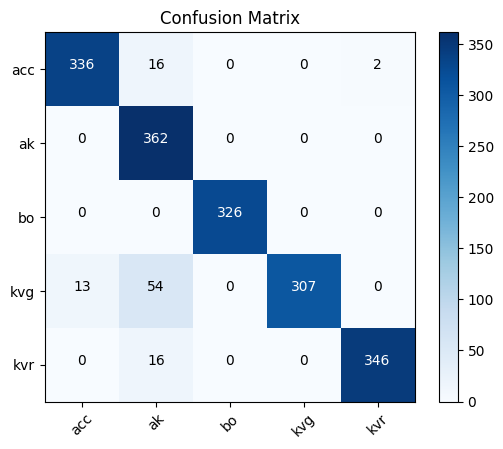

In [37]:
cm_plot_label = ["acc", "ak", "bo", "kvg", "kvr"]
plot_confusion_matrix(cm=cm, classes=cm_plot_label, title='Confusion Matrix')

How to read the graph?
 - the number tells number of times the model predict that restult.
 - Example, model predict no_side_effects and a wrong prediction of had_side_effect 10 times.
 - Y-axise are exected class
 - X-axise are predicted class

# Save Model

## 1. Model.save()

In [38]:
# Check first to see if file exists already.
# If not, the model is saved to disk
import os.path
if os.path.isfile('/squatModel_noOther.h5') is False:
    model.save('squatModel_noOther.h5')

This saves...
 1. The architecture of the model, allowing to re-create the model.
 2. The weights of the model
 3. The training configuration (loss, optimizer)
 4. The state of the optimizer, allowing to resume training exactly where you left of

## 2. Load Model

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('medical_trail_model.h5')

In [ ]:
new_model.summary()

In [ ]:
new_model.get_weights()

In [ ]:
new_model.optimizer

# Debugging Code

In [ ]:
# Test getCenter()
(getCenter([0,8,8,8,0,16,8,16]) == [4,12])

In [ ]:
# Test normalized()
centerXY = getCenter([0,8,8,8,0,16,8,16])
output = normalized([0,8], centerXY)
print(output, ": expected [-0.5, -1/3]")

In [ ]:
## Print out data
for i in predictions:
    print(i)